## PREDICTING CAR PRICE FOR 1980-2016 DATA

This excercise is from the 365 DataScience channel. The goal is to get a prediction on car price based on the qualities of the car such as Model, Year, Engine Volume and Mileage.


We will follow a strategy of exploratory data analysis (EDA) first to check each of our variables properties.


First, we will preprocess the data, this includes:

1. Dropping all missing values.

2. Removing outliers to get better predictions.

3. Transforming (if necessary) variables to a log scale.

         We will compare Price vs mileage and log_price vs mileage to see if it's necesary to transform price data to a logarithmic scale. 

4. Check the Ordinary Least Square method assumptions such as:
* Homoscedasticity
* No multicolinearity


Finally, we will evaluate how different tipes of dummy variables could help us improving our R^2 score, those test are: 

* Using all brands as dummies
* Using a dummy variable if the model is above or below 2005.


As our second step, we will start training our linear regression model to get the best fit for our data. We will use feature scaling (Standarization) to reduce the magnitude of the values. We will also split our data into 80/20 for  training/testing our model. 

After training the regression model we will test it with the test data to obtain the difference between real and predicted values.

A conclusion is included at the end of the notebook with further improvements.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.linear_model as LinearRegression
import seaborn as sns
sns.set()

## Loading raw data

In [3]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


One can see that the data includes categorical and numerical values. 

As a first step, we must check that all the values have the same amount of entries.

In [4]:
raw_data.describe(include="all") #if we add the argument 'include=all', one could see the description of cat. variables as well.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Here's a quick summary of what we can find on the data:

* There are 7 unique car brands (Cat. Var.) that could be converted to dummy to have a better prediction.

* There are 312 unique car models (Cat. Var.) we are going to convert it to dummy variables as well and see if it brings any higher prediction value.

* We note that the max price for a car is \\$ 300,000.00  but 75\% of the prices are under \\$ 21700.00, that could lead that we have some outliers we must get rid of.
* That same previous logic also is observed in mileage and engineV values.

* We encounter a different value of counts on price and engineV value among the other variables. Our first goal is to have equal count on each row. 

In [6]:
raw_data.isnull().sum() #We count the missing values on each column

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

We found that there area 172 and 150 on Price and EngineV columns. To get rid of them, we will call dropna method.

In [7]:
data_no_mv = raw_data.dropna(axis=0) #We use axis=0 to indicate that all rows with missing values must be eliminated

In [16]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


We can see that we have the same amount of count for each column. Let's proceed with exploring each numerical variable's probability distribution formula.

## Exploring PDFs

### Price

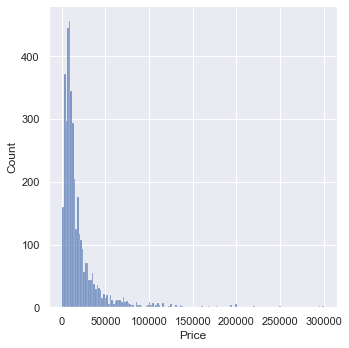

In [17]:
sns.displot(data_no_mv['Price'])

### Dealing w outliers
as we have seen before, there are Price values that are affecting the way the data is spread. We will remove those outliers using quantile functions and we will only work with 96% of the values. We will evaluate if the 4% missing would be crucial for the model. 

In [19]:
q = data_no_mv["Price"].quantile(0.96) #it will find the value for the 0.96 quantile
data_no_outl = data_no_mv[data_no_mv["Price"]<q] #A variable called data_no_outl will be created with all prices values lowers than q
data_no_outl.describe(include='all') #New data summary

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3863,3863.000000,3863,3863.000000,3863.000000,3863,3863,3863.000000,3863
unique,7,NaN,6,NaN,NaN,4,2,NaN,295
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,876,NaN,1497,NaN,NaN,1766,3492,NaN,188
mean,NaN,15457.605736,NaN,169.874709,2.720062,NaN,NaN,2006.022262,NaN
std,NaN,13258.011113,NaN,100.668539,5.028157,NaN,NaN,6.589701,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6899.500000,NaN,100.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,10999.000000,NaN,161.000000,2.150000,NaN,NaN,2007.000000,NaN
75%,NaN,19900.000000,NaN,233.000000,3.000000,NaN,NaN,2011.000000,NaN


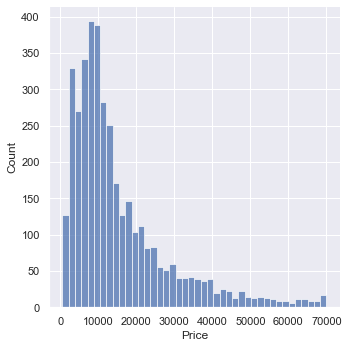

In [20]:
sns.displot(data_no_outl['Price'])

That's all we can do for now for price var.

### Mileage

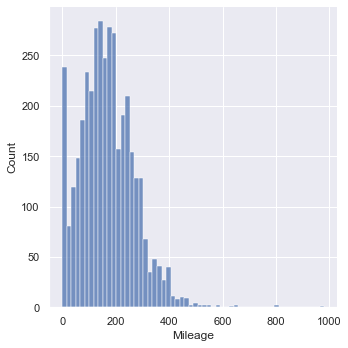

In [21]:
sns.displot(data_no_outl['Mileage'])

We can see a right tail on the mileage values that we could take advantage if we get rid of. 

In [22]:
q = data_no_outl["Mileage"].quantile(0.99)
data_no_outl_2 = data_no_outl[data_no_outl['Mileage']<q]
data_no_outl_2.describe()

,Price,Mileage,EngineV,Year
count,3824.000000,3824.000000,3824.000000,3824.000000
mean,15530.068243,166.248169,2.723588,2006.117155
std,13247.448708,93.808337,5.053033,6.513543
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,98.750000,1.800000,2002.000000
50%,11000.000000,160.000000,2.120000,2007.000000
75%,19991.250000,230.000000,3.000000,2011.000000
max,69999.000000,438.000000,99.990000,2016.000000


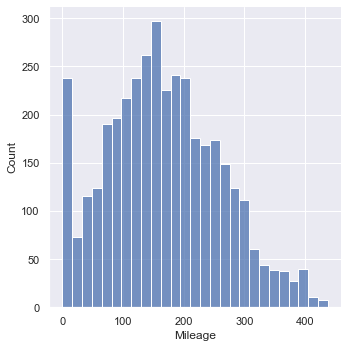

In [23]:
sns.displot(data_no_outl_2["Mileage"])

Alles sieht sehr gut bis jetzt. Wir haben die Mileage range minimizieren.

### EngineV

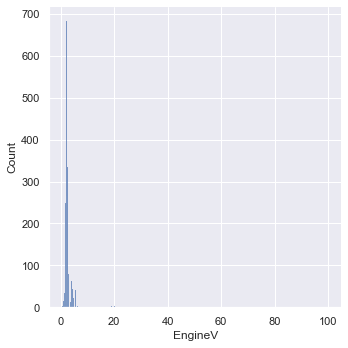

In [24]:
sns.displot(data_no_outl_2["EngineV"])

It looks like we must get rid of the big values of Engine Volumes. This time, instead of reducing the range to a 99% of the quantile, we will just reduce it to the value of 6.5. That could be the biggest volume one could find on a modern car nowadays. The reason that there were 99.99 values on the data could be because in some databases 99.99 means null. 

In [25]:
data_no_outl_3 = data_no_outl_2[data_no_outl_2["EngineV"]<6.5]

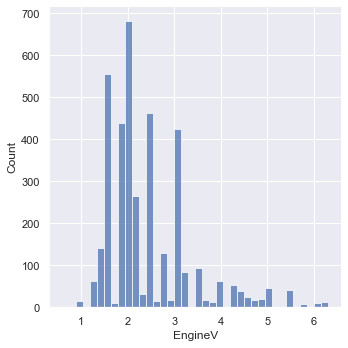

In [26]:
sns.displot(data_no_outl_3['EngineV'])

### Year

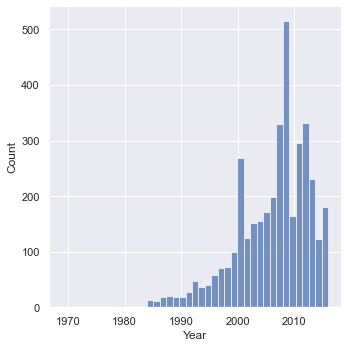

In [27]:
sns.displot(data_no_outl_3["Year"])

We can see some values going to the 1970's that may affect our model, we will eliminate those values.

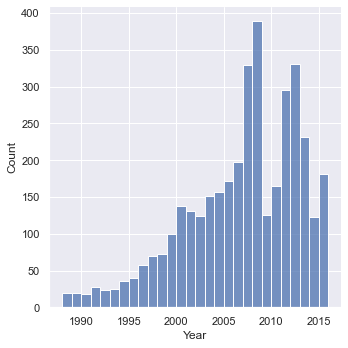

In [28]:
q = data_no_outl_3["Year"].quantile(0.01)
data_no_outl_4 = data_no_outl_3[data_no_outl_3["Year"]>q]
sns.displot(data_no_outl_4['Year'])

### Overview of data exploration
Up next, we can see in a arranged way how the data looks now.

Text(0.5, 1.0, 'Year')

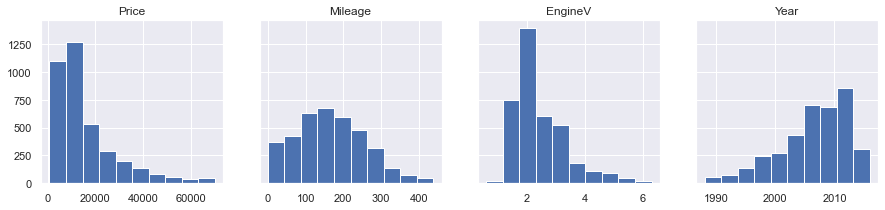

In [33]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.hist(data_no_outl_4['Price'])
ax1.set_title('Price')
ax2.hist(data_no_outl_4['Mileage'])
ax2.set_title('Mileage')
ax3.hist(data_no_outl_4['EngineV'])
ax3.set_title('EngineV')
ax4.hist(data_no_outl_4['Year'])
ax4.set_title('Year')

In [34]:
data_cleaned = data_no_outl_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3747,3747.000000,3747,3747.000000,3747.000000,3747,3747,3747.000000,3747
unique,7,NaN,6,NaN,NaN,4,2,NaN,284
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,844,NaN,1437,NaN,NaN,1720,3385,NaN,181
mean,NaN,15749.590368,NaN,165.374433,2.416405,NaN,NaN,2006.441687,NaN
std,NaN,13263.641812,NaN,93.393760,0.928049,NaN,NaN,6.011068,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7000.000000,NaN,98.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11300.000000,NaN,160.000000,2.140000,NaN,NaN,2007.000000,NaN
75%,NaN,20003.500000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


The data looks with no big outliers and now that it's cleaned, we can start checking the OLS methods assumption!.

## Checking OLS assumptions


### Homoscedasticity
The variance of the data must be similar along the values to the mean. If not, we must apply some transformation to the values. 

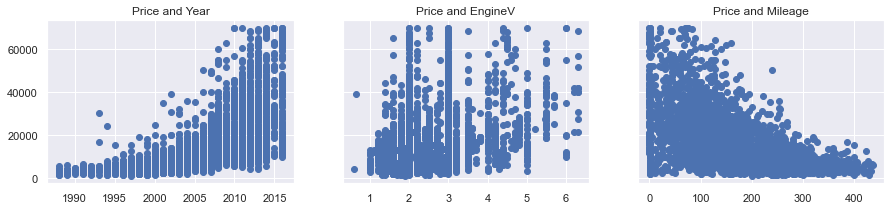

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

From the graphs above we can see that the relationship between price and the other variables are not lineal. We must apply a log transformation on the Price variable to obtain a better **Homoscedasticity**.

In [36]:
log_price = np.log(data_cleaned['Price'])
data_cleaned["log_price"] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3742,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
3743,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3744,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3745,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


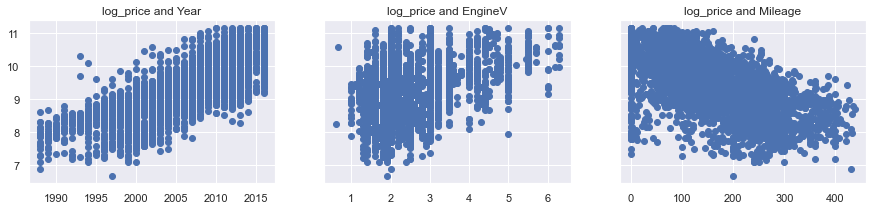

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')


plt.show()

Now it looks way more linear than ever. If we didn't transform the price data to a log scale, our linear regression model wouldn't fit the data for example after the year 2007 or before the 300 miles. With that being said, we will drop Price column and keep only log_price. 

From the previous graphs we can also observe that:

* Cars tends to be cheaper as they get old.
* The higher the Engine Volume, the expensive the car is.
* The more mileage the car has, the cheaper it would be. 

### Multicolinearity
We will check if there is a correlation between the numerical variables that we wanto to include to our model. 

In [38]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
variables = data_cleaned[['Mileage','Year','EngineV']]
VIF_df = pd.DataFrame()
VIF_df['VIF'] = [vif(variables.values, i) for i in range(variables.shape[1])]
VIF_df["Features"] = variables.columns

In [40]:
VIF_df

,VIF,Features
0,4.124778,Mileage
1,10.300473,Year
2,7.808383,EngineV


A high VIF value indicates high correlation of the variables. We don't want repeated variables that could contribute to maximizing the error of the prediction. With that being said, we could proceed to drop the Year Column from the dataframe but we will instead create a dummy variable for cars that are older or younger than the year 2005 and check the new VIF value. 

In [41]:
def year_dummy(year):
    if year >= 2007:
        value = 1
    else:
        value = 0 
    return value


In [45]:
data_cleaned["Year_dummy"] = [year_dummy(i) for i in data_cleaned["Year"]]

In [48]:
# We will recheck the VIF values now with the year_dummy variable
variables = data_cleaned[['Mileage','Year_dummy','EngineV']]
VIF_df = pd.DataFrame()
VIF_df['VIF'] = [vif(variables.values, i) for i in range(variables.shape[1])]
VIF_df["Features"] = variables.columns
VIF_df

,VIF,Features
0,3.372822,Mileage
1,2.136946,Year_dummy
2,5.205274,EngineV


Our assumption to transform year to a dummy variable was right and its VIF value changed from 10.3 to 2.13, that way we can keep it and make our model fit better.

In [49]:
data_no_multicollinearity = data_cleaned.drop(['Year','Price'],axis=1) #We could safely get rid of those columns

#### Creating Dummy variables
We will convert categorical data to numerical. That way, our model can have better acurracy.

In [50]:
data_w_dumm = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [51]:
data_w_dumm.head()

,Mileage,EngineV,log_price,Year_dummy,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


We now have 302 columns, they may not be useful for the model, so we will check VIF on them.

In [53]:
data_to_vif = data_w_dumm.drop(['log_price'],axis = 1)

In [55]:
VIF_df = pd.DataFrame()
VIF_df['VIF'] = [vif(data_to_vif.values, i) for i in range(data_to_vif.shape[1])]
VIF_df["Features"] = data_to_vif.columns

c:\users\victo\pycharmprojects\datascienceproj\venv\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


The VIF calculation takes more time as the number of columns increases

In [56]:
pd.set_option("max_rows",10)
VIF_df

,VIF,Features
0,2.269708,Mileage
1,7.142766,EngineV
2,2.310348,Year_dummy
3,622.517730,Brand_BMW
4,1096.221459,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,7.202742,Body_hatch


As we can see on the previous VIF_df, there are a lot of inf values that are not helpful to our model at all. Those inf could be caused because there are not enough data for certain models and since all of the values are 0, the VIF finds a correlation and throws an inf value. With that being said, we will drop all models and keep only the brands. If we wanted to make a prediction based on the model, we would need more data on each model. 

In [63]:
#We will now create again new variables and check VIF values with models dropped

data_no_multicollinearity = data_cleaned.drop(['Model','Year',"Price"],axis=1)

In [64]:
data_w_dumm = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [69]:
data_w_dumm.head() 


,Mileage,EngineV,log_price,Year_dummy,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [70]:
data_w_dumm.shape
#We can see that the new DF has now 19 columns compared to 302

(3747, 19)

In [72]:
data_to_vif = data_w_dumm.drop(['log_price'],axis = 1)
VIF_df = pd.DataFrame()
VIF_df['VIF'] = [vif(data_to_vif.values, i) for i in range(data_to_vif.shape[1])]
VIF_df["Features"] = data_to_vif.columns
VIF_df

,VIF,Features
0,6.343152,Mileage
1,8.557985,EngineV
2,3.794953,Year_dummy
3,2.313359,Brand_BMW
4,2.859855,Brand_Mercedes-Benz
5,1.718313,Brand_Mitsubishi
6,2.183164,Brand_Renault
7,2.230552,Brand_Toyota
8,3.009582,Brand_Volkswagen
9,1.484825,Body_hatch


We now find that Registration_yes column is the highest VIF value followed by EngineV and Mileage value. We will drop Registration_yes and recheck what happens with the rest of the VIFs.

In [74]:
data_to_vif = data_w_dumm.drop(['log_price','Registration_yes'],axis = 1)
VIF_df = pd.DataFrame()
VIF_df['VIF'] = [vif(data_to_vif.values, i) for i in range(data_to_vif.shape[1])]
VIF_df["Features"] = data_to_vif.columns
VIF_df

,VIF,Features
0,6.249460,Mileage
1,7.816871,EngineV
2,3.230632,Year_dummy
3,2.252956,Brand_BMW
4,2.764528,Brand_Mercedes-Benz
5,1.635326,Brand_Mitsubishi
6,2.028362,Brand_Renault
7,2.125687,Brand_Toyota
8,2.799565,Brand_Volkswagen
9,1.465348,Body_hatch


Lastly, to reduce EngineV VIF value, we will convert it to a dummy variable that returns 1 if the volume is higher or equal than 3 and 0 if the volume is lower than 3. Other option could be that we assign a column for each unity of volume increased. 

In [78]:
#As prices tends to rise when the engine volume is higher, if the volume is higher than 3, its value will be 1.
def Convert_EngineV_dummy(EngineVol):
    if EngineVol >= 3:
        value = 1
    else:
        value = 0
    return value

In [84]:
#We create the new dummy column

data_w_dumm['EngineV_dummy'] = [Convert_EngineV_dummy(i) for i in data_w_dumm['EngineV']] 


In [92]:
#Lastly, we recheck the VIF values 

data_to_vif = data_w_dumm.drop(['EngineV','Registration_yes','log_price'],axis=1)
VIF_df = pd.DataFrame()
VIF_df['VIF'] = [vif(data_to_vif.values, i) for i in range(data_to_vif.shape[1])]
VIF_df["Features"] = data_to_vif.columns
VIF_df

,VIF,Features
0,5.245053,Mileage
1,2.912189,Year_dummy
2,2.120388,Brand_BMW
3,2.512901,Brand_Mercedes-Benz
4,1.612535,Brand_Mitsubishi
5,2.016212,Brand_Renault
6,1.991336,Brand_Toyota
7,2.726582,Brand_Volkswagen
8,1.508267,Body_hatch
9,1.596460,Body_other


We can appreciate how now the Mileage feature has the highest VIF, that means there is a relation between Mileage and another Feature, one of the cons of VIF is that it doesn't show to which variable the high VIF are correlated. We will keep our DF with the columns showed before and start preparing our model.

In [93]:
#We now create a new variable with the columns that showed low VIF 
data_preprocessed = data_w_dumm.drop(['EngineV','Registration_yes'],axis=1)
data_preprocessed.columns.values

array(['Mileage', 'log_price', 'Year_dummy', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'EngineV_dummy'],
      dtype=object)

## Linear Regression Model

### Declaring inputs and targets for price without LOG

In [96]:
#Target(s) are the dependent variable
targets = data_preprocessed['log_price']
#Inputs are the independent variables, all but the price
inputs = data_preprocessed.drop(["log_price"], axis = 1)

### Scaling Data

In [98]:
from sklearn.preprocessing import StandardScaler

#we create a scaler object
scaler = StandardScaler()
#Fit the inputs on the scaler object
scaler.fit(inputs)

StandardScaler()

In [118]:
#we will now scale the inputs and store them in a new variable
inputs_scaled = scaler.transform(inputs)
inputs_scaled.shape
#We observe 3747 rows of 17 subarrays with our transformed data

(3747, 17)

### Statsmodels quick deviation

We will import statsmodels libary to have a quick check on our preprocessed values, we just want to check how our variables do on the p-value test and on R-squared and adj-R-squared.

In [119]:
import statsmodels.api as sm
x = sm.add_constant(inputs_scaled)
sm_reg_results = sm.OLS(targets,x).fit()
sm_reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     499.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:21:51   Log-Likelihood:                -2304.4
No. Observations:                3747   AIC:                             4645.
Df Residuals:                    3729   BIC:                             4757.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3504      0.007   1275.779      0.000       9.336       9.365
x1            -0.2579      0.010    -26.011      0.000      -0.277      -0.238
x2             0.3453      0.010     35.961      0.000       0.326       0.364
x3             0.0202      0.011      1.855      0.064      -0.001       0.042
x4             0.0324      0.011      2.835      0.005       0.010       0.055
x5            -0.1399      0.010    -14.263      0.000      -0.159      -0.121
x6            -0.1779      0.011    -16.676      0.000      -0.199      -0.157
x7            -0.0353      0.011     -3.277      0.001      -0.056      -0.014
x8            -0.0776      0.012     -6.464      0.000      -0.101      -0.054
x9            -0.1584      0.009    -17.415      0.000      -0.176      -0.141
x10           -0.0743      0.009     -8.072      0.000      -0.092      -0.056
x11           -0.1926      0.011    -16.783      0.000      -0.215      -0.170
x12           -0.1411      0.010    -14.271      0.000      -0.160      -0.122
x13           -0.1206      0.012    -10.483      0.000      -0.143      -0.098
x14           -0.0249      0.009     -2.834      0.005      -0.042      -0.008
x15           -0.0096      0.008     -1.275      0.203      -0.024       0.005
x16           -0.0376      0.009     -4.080      0.000      -0.056      -0.020
x17            0.1696      0.009     19.156      0.000       0.152       0.187
==============================================================================
Omnibus:                      228.203   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.235
Skew:                          -0.540   Prob(JB):                     1.30e-69
Kurtosis:                       3.930   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the previous summary we see that x3 (probably Mileage) coeff has a p-val higher than 0.05, that means that that there is not enough evidence that shows that x3 coeff value is different from 0. For practical purposes, we will keep it that way and follow with our model.
0
We also note the R^2 values, comparing them to the teachers score (R^2 = 0.745), one reason could be that we used less data for the model because we wanted to reduce the price interval.

### Train/Test split

In [105]:
from sklearn.model_selection import train_test_split

#We will split the values on a 80-20 ratio and keep the same random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state=123)

## Create the regression

In [109]:
#Create a linear regression object
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
#Fit the x_train,y_train to the regression model
reg.fit(x_train, y_train)


LinearRegression()

In [110]:
#Now we will check the output of the regression
#crearemos una nueva variable y_hat con las predicciones del modelo
y_hat = reg.predict(x_train)

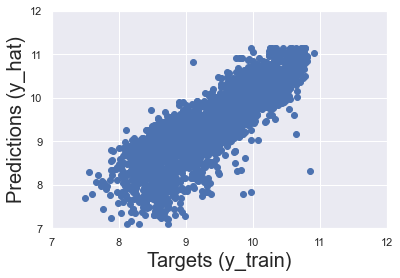

In [112]:
#now we will plot y_hat vs y_train to check how similiar they are
#If the values keep on the 45degrees angle, out model fits well the data
plt.scatter(y_hat,y_train)
plt.xlabel("Targets (y_train)", size = 20)
plt.ylabel('Predictions (y_hat)', size = 20)

#because we want to compare the values, we will fix the limits 
plt.xlim(7,12)
plt.ylim(7,12)
plt.show()

We observe that most of the data is on the 45-degree line but there are as well some outliers on the higher values of y_train. There is also a higher variability on the bottom of the line, telling us that the estimation for lower prices are a little bit more ambiguous. 

## Residual plots

Text(0.5, 1.0, 'Residuals PDF')

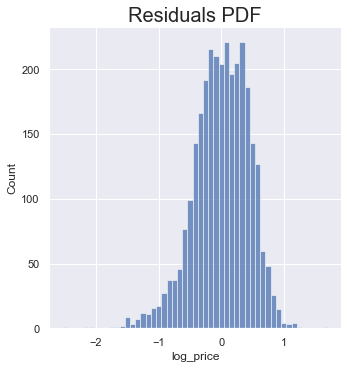

In [114]:
#We will check now how the residuals are plotted on a probability distribution formula
sns.displot(y_train - y_hat)

#Include a title
plt.title('Residuals PDF', size = 20)

#In the best scenario, the plot should be normally distributed


On the previous graph we note a normal distribution with the negative tail being bigger than the positive, that means that our y_hat (Predicted) values are higher than the real values.

## Score

In [115]:
# We find now R^2 
reg.score(x_train,y_train)

0.6969056079798783

## Finding weight and bias

In [120]:
#we find the bias (intercept) of the model
reg.intercept_

9.346064578975952

In [122]:
#obtain the weight (Coefficients) of the model
reg.coef_

#These values are not so good for a interpretation right now

array([-0.25246579,  0.34986943,  0.02041378,  0.0303774 , -0.14414479,
       -0.17449995, -0.03474739, -0.07793863, -0.15612826, -0.07033731,
       -0.19064085, -0.14358389, -0.12593491, -0.0313504 , -0.00973743,
       -0.04764159,  0.1673014 ])

In [123]:
#Create a DF with the weight values
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.252466
1,Year_dummy,0.349869
2,Brand_BMW,0.020414
3,Brand_Mercedes-Benz,0.030377
4,Brand_Mitsubishi,-0.144145
5,Brand_Renault,-0.174500
6,Brand_Toyota,-0.034747
7,Brand_Volkswagen,-0.077939
8,Body_hatch,-0.156128
9,Body_other,-0.070337


The symbols on the previous coefficients show how much it adds or decreases the overall log_price if one of those are true or false. For example. the higher the Mileage, the lower the price.


## Testing

We will test the algorythm with a new dataset that we have splited at the begining

In [125]:
#we will create a new variable with the fitting of the test values
y_hat_test = reg.predict(x_test)

Text(0, 0.5, 'Predictions (y_hat_test)')

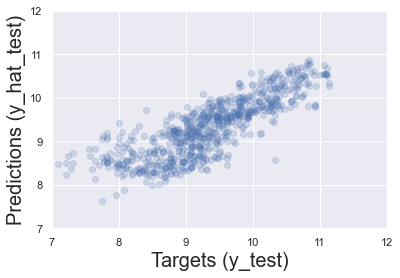

In [127]:
plt.scatter(y_test,y_hat_test, alpha = 0.2)
#Fixing limits
plt.xlim(7,12)
plt.ylim(7,12)
#Labeling
plt.xlabel('Targets (y_test)', size = 20)
plt.ylabel('Predictions (y_hat_test)', size = 20)

The previous test fits OK the values, even though we find little dispersion on the lower quarter.

In [128]:
#we will predict all of the data and save it on a DF
#we need to convert from log to normal prices using exp
df_pred = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])

,Prediction
0,21712.470044
1,4739.832011
2,6519.827290
3,5213.915098
4,4781.794009
5,4079.639883
6,43448.793522
7,7429.523212
8,5988.165523
9,10464.944642


In [130]:
#We will include all of the real values as well on the previous df
#for that, we will reset the index first and then join them
y_test = y_test.reset_index(drop = True)
df_pred['Target'] = np.exp(y_test)

,Prediction,Target
0,21712.470044,14474.00
1,4739.832011,15000.00
2,6519.827290,5800.00
3,5213.915098,11800.00
4,4781.794009,3150.00
5,4079.639883,3800.00
6,43448.793522,48000.00
7,7429.523212,6900.00
8,5988.165523,2900.00
9,10464.944642,6800.00


In [131]:
#we will also add a 'Residual' column to check the difference between real values and predictions
df_pred["Residuals"] = df_pred['Target'] - df_pred["Prediction"]

In [133]:
#We will include as well a percentage difference, which is a little bit more interpretable
df_pred["% Diff"] = np.absolute((df_pred["Residuals"]/df_pred["Target"])*100)

,Prediction,Target,Residuals,% Diff
0,21712.470044,14474.00,-7238.470044,50.010156
1,4739.832011,15000.00,10260.167989,68.401120
2,6519.827290,5800.00,-719.827290,12.410815
3,5213.915098,11800.00,6586.084902,55.814279
4,4781.794009,3150.00,-1631.794009,51.802984
5,4079.639883,3800.00,-279.639883,7.358944
6,43448.793522,48000.00,4551.206478,9.481680
7,7429.523212,6900.00,-529.523212,7.674249
8,5988.165523,2900.00,-3088.165523,106.488466
9,10464.944642,6800.00,-3664.944642,53.896245


In [136]:
#lets now explore the df
df_pred.describe()

,Prediction,Target,Residuals,% Diff
count,750.000000,750.000000,750.000000,750.000000
mean,13961.990710,15707.276253,1745.285543,39.490546
std,9785.309874,13298.560882,7163.658960,46.901261
min,2068.663409,800.000000,-17789.290882,0.033528
25%,6236.209591,6800.000000,-2394.130551,14.498107
50%,11088.133538,11000.000000,512.619728,28.901592
75%,18071.715791,20000.000000,3995.511584,45.997186
max,53056.399020,68500.000000,39588.313587,434.390279


In [138]:
#We will change the decimals displayed on the df, for that, we use the following:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#We will sort he values by difference in % Diff
df_pred.sort_values(by = ['% Diff'])

,Prediction,Target,Residuals,% Diff
615,18093.93,18100.00,6.07,0.03
565,21017.93,20996.24,-21.69,0.10
350,9439.06,9450.00,10.94,0.12
267,8112.30,8100.00,-12.30,0.15
414,9436.05,9400.00,-36.05,0.38
316,13816.79,13900.00,83.21,0.60
95,14808.78,14900.00,91.22,0.61
178,4831.69,4800.00,-31.69,0.66
396,29798.24,29999.00,200.76,0.67
691,19753.61,19600.00,-153.61,0.78


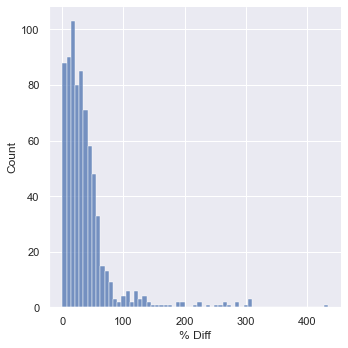

In [135]:
sns.displot(df_pred['% Diff'])

With the previous graph, we find most of the values of % Diff under 50%, that means that our model mostly predicts price values that are half or the double of the real price. This info could help us to improve the overall prediction mean always aiming to reduce that value.


(0.0, 70000.0)

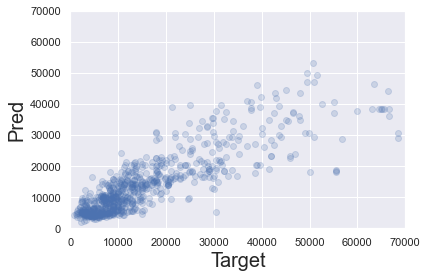

In [141]:
#we will plot the values obtained vs the real
plt.scatter(df_pred['Target'], df_pred["Prediction"], alpha = 0.2)
#labels
plt.xlabel("Target", size= 20)
plt.ylabel("Pred", size = 20)
#Limits
plt.xlim(0,70000)
plt.ylim(0,70000)

We note that there are some good predictions on the lower prices but as the prices increases, theres a higher variability. Further improvement could be done expanding the quantile range of the price we have reduced to 0.96 in the beginning of the project. 

## Conclusions

This model could be helpful to estimate the price for a car that we would like to sell using as input values its mileage, engine volume, year and model. In this project we have sucessfully removed missing values, dealt with outliers, checked the OLS assumption, transformed the data to fit a linear regression model, created dummies to improve overall prediction, developed a LR model and then tested it with a separate data. 

As a result, we obtain that the R^2 value is 0.69 and that the mean % of difference between real and predicted value lies on 34%, that mean that our estimated prices could be in average 33% higher or lower than the real ones. 

We could increase the R^2 and the overall prediction power if we increased the dataset and also if we added some new columns such as damaged paint, furniture, pieces, etc. 